STOCK PREDICTION PROJECT 

In [186]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt 

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
#calling the file in nyse named prices.csv
df =pd.read_csv("data/prices.csv", header=0)
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [189]:
#size of the dataset in 851264 rows and 7 columns
print(df.shape)

(851264, 7)


In [190]:
# takes 20 different and unique from symbol
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [191]:
# symbols here are Ticker symbol from comp_info i.e they are the company code names
# find the length of column named symbol
print(len(df.symbol.values))

851264


In [192]:
#gives the details of each columns of the dataset like mean, max etc
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [193]:
#checking whether their is any null value in the dataset
# .sum() will give the total no. of null value column vise 
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [194]:
# taking all the unique or one time value in the date column 
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [195]:
#calling the file in nyse named securities.csv
comp_info = pd.read_csv('data/securities.csv')
comp_info

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


Data Description 

In [196]:
# taking total no. of unique values in column Ticket symbol
comp_info["Ticker symbol"].nunique()

505

In [197]:
# for locating specific data here.... in security column of string that starts with "Face"
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [198]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


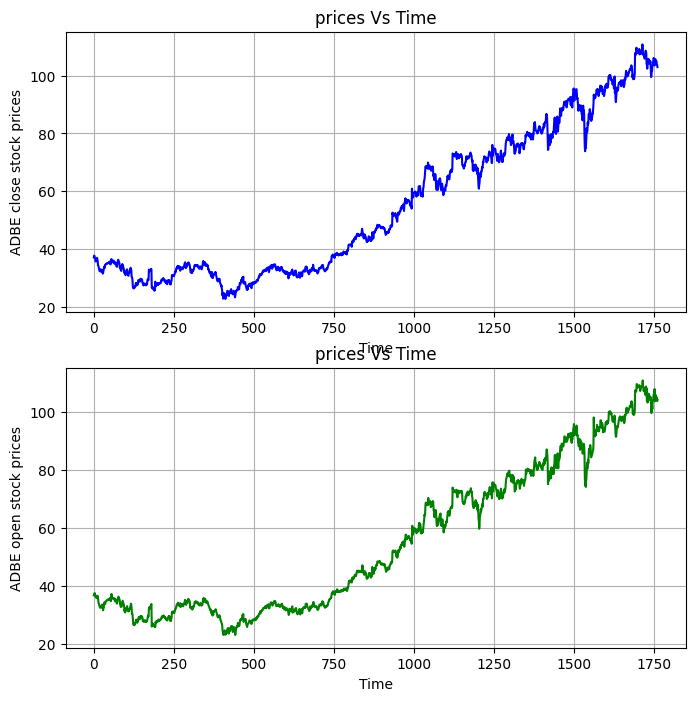

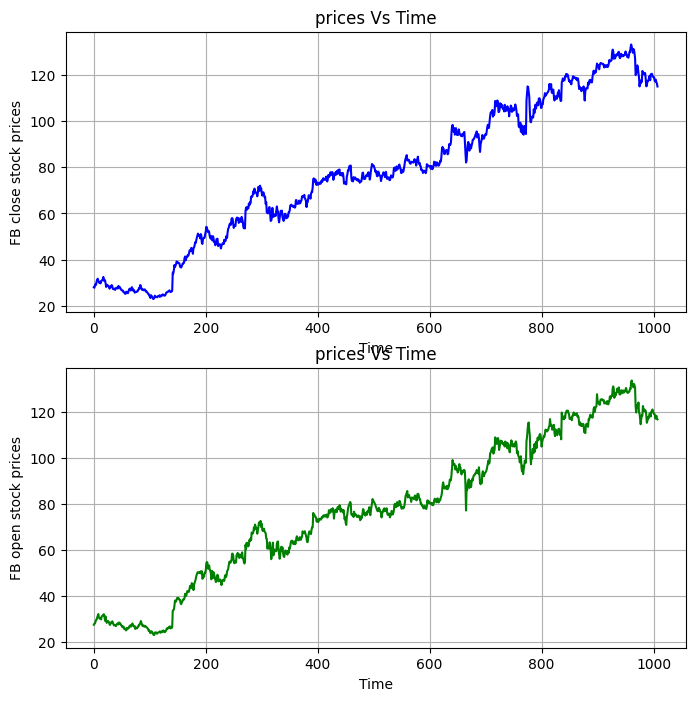

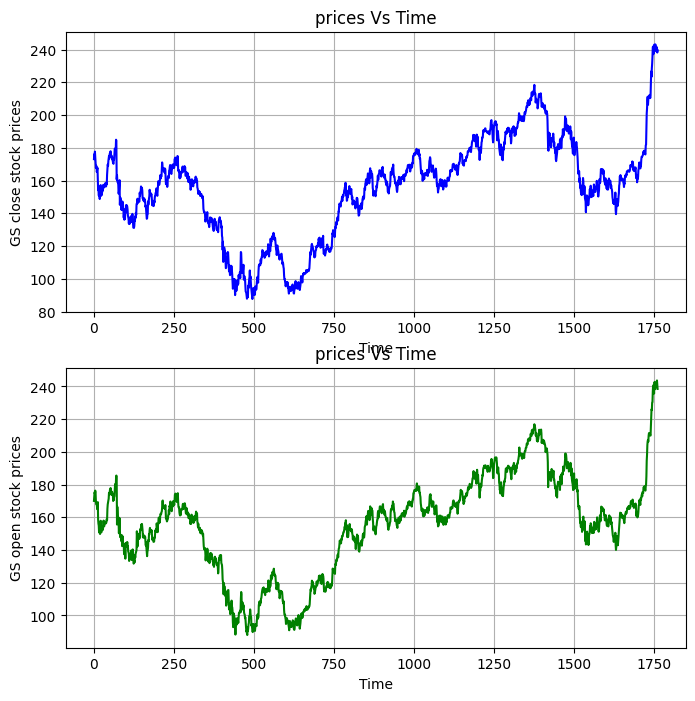

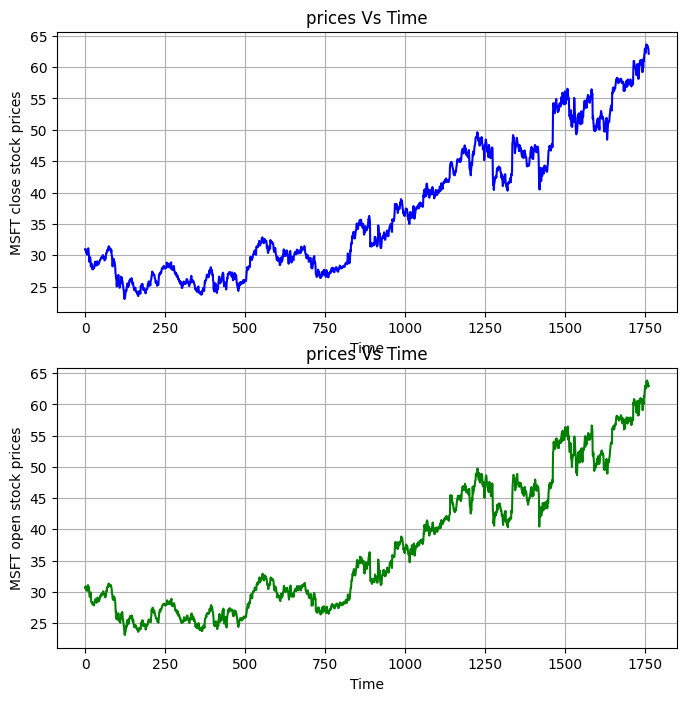

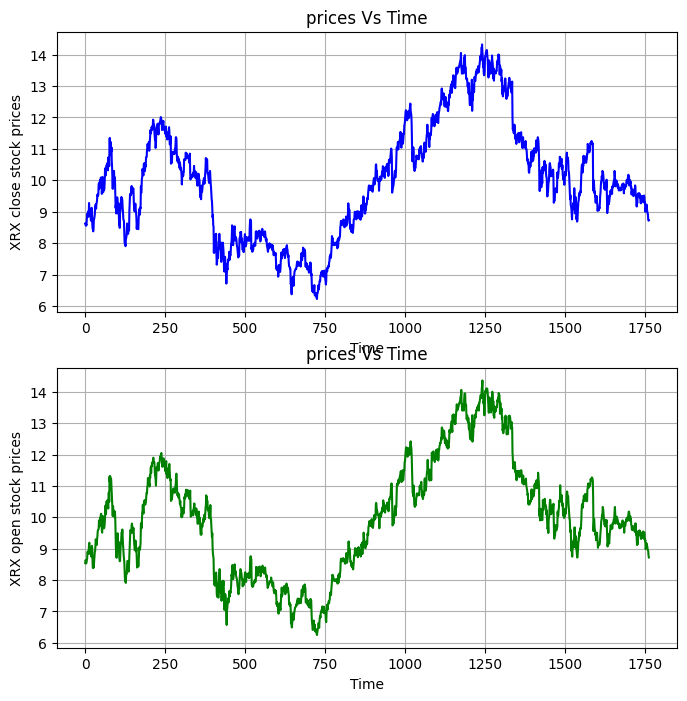

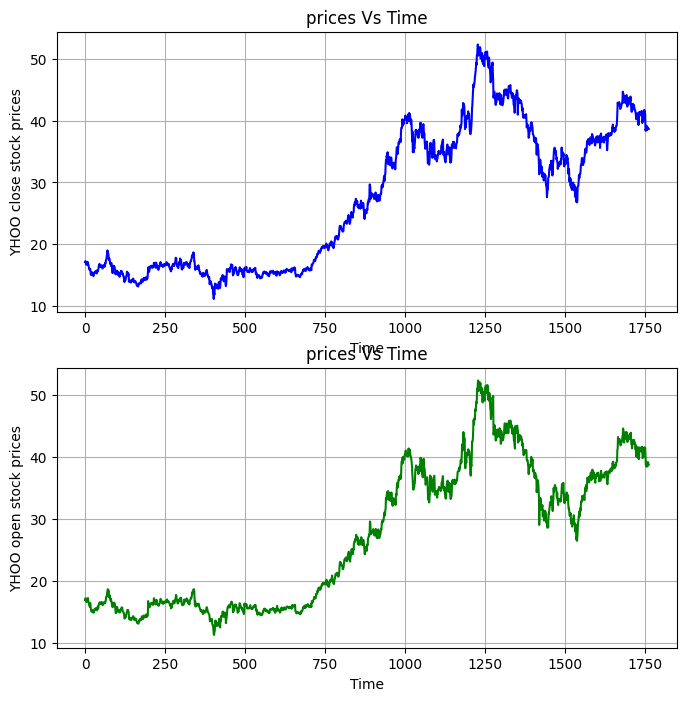

In [199]:

def plotter(code):
    # creating variable for whole notebook
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing
    f, axs = plt.subplots(2,2,figsize=(8,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values
    company = company.open.values.astype('float32')
    #reshaping the open column value in 1D and calling it opening_stock
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    plt.ylabel(code + " open stock prices") # setting Y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph

# calling the graphs through the function    
for i in comp_plot:
    plotter(i)

In [202]:
#taking the values of closing_stock in a single list
closing_stock[:,0]

array([17.1 , 17.23, 17.17, ..., 38.73, 38.64, 38.67], dtype=float32)

In [201]:
#taking the values of closing_stock in a single list called stocks
stocks = closing_stock[: , 0]
print(stocks)
#reshaping the stocks in 1D array form
stocks = stocks.reshape(len(stocks) , 1)

[17.1  17.23 17.17 ... 38.73 38.64 38.67]


**Feature scaling the vector for better model performance.**

In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scaling features between 0 and 1
stocks = scaler.fit_transform(stocks) # it will start learning algo and then provide scaled and dimension reduced output

In [204]:
train = int(len(stocks) * 0.80) #creating sizes of train and taking 80% percentage of the part
test = len(stocks) - train #creating sizes of test as total minus train

In [205]:
#sizes of train and test
print(train , test)

1409 353


In [206]:
#divinding the values of stocks data to train from 0 to 1409 i.e 80% data
train = stocks[0:train]
print(train)

[[0.14559111]
 [0.14874032]
 [0.14728683]
 ...
 [0.63372093]
 [0.6145833 ]
 [0.6196705 ]]


In [207]:
#divinding the values of stocks data to test from train ending to stock data ending i.e rest 20% data
test = stocks[len(train) : ]

In [208]:
#reshaping train data in 1D array form
train = train.reshape(len(train) , 1)
#reshaping test data in 1D array form
test = test.reshape(len(test) , 1)

In [209]:
#new train and test array shape
print(train.shape , test.shape)

(1409, 1) (353, 1)


**Process data for the required input for LSTM.**

**LSTM (Long Short-Term Memory)** which maintains a cell state as well as a carry for ensuring that the signal (information in the form of a gradient) is not lost as the sequence is processed. At each time step the LSTM considers the current word, the carry, and the cell state.

**GRU** is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.

In [210]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features-1):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # her a is value of data from i to i+ n_features in 1D and putting it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array

#so the stucture of trainX and trainY is somehow like this
# trainX=[[i1 , i2,...., i n_features ]] and trainY=[i + n_features]  
# trainY will show the future value of trainX values

In [211]:
n_features = 2
# and here we create train X,Y and test X,Y data where trainX, testX has two value is each block
trainX, trainY = process_data(train, n_features)
# testY, trainY has one value that will be of two step ahead of corresponding(testY,trainX) value
testX, testY = process_data(test, n_features)

In [212]:
# printing the structure of train X,Y and test X,Y
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(1406, 2) (1406,) (350, 2) (350,)


In [213]:
# reshaping trainX and testX to use in deeplearning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

**Activation** - the activation layer in keras is equivalent to a dense layer with the same activation passed as an argument. As per your example if the activation layer is used as a layer, this will act as a transformation of the outputs of the previous layer.The output of the first layer is the result of a densely connected layer with a tanh function. Then these outputs will each be transformed by a relu function.

In [214]:
import math # helps us do mathematical operations
from keras.models import Sequential # for setting layers one by one neural layer in model 
from keras.layers import Dense , BatchNormalization , Dropout , Activation # types of layers
from keras.layers import LSTM , GRU # types of RNN
from sklearn.preprocessing import MinMaxScaler #It puts the data in between given range to set data before putting layer
from sklearn.metrics import mean_squared_error # In this method the errors in column is squared and then mean is found 
from keras.optimizers import Adam , SGD , RMSprop # they are the algos that found the output for model

**keras** - Keras contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing deep neural network code.

**RNN** - recurrent neural network processes sequences — whether daily stock prices, sentences, or sensor measurements — one element at a time while retaining a memory (called a state) of what has come previously in the sequence.Recurrent means the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements.

**Optimizers** - Optimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in computing the target values(Y) from the set of predictors(X) used in the model.

**Checkpointing the model when required and using other callbacks.**

In [215]:
filepath="model/stock_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# the model reduce the learning rate where the value are not repeated or too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
# for saving the best result value from the epoochs as checkpoints
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

**Callbacks** - A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.

**ReduceLROnPlateau** - Reduce learning rate when a metric has stopped improving.Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

**ModelCheckpoint** - Save the model after every epoch.filepath can contain named formatting options, which will be filled with the values of epoch and keys in logs (passed in on_epoch_end).

**Dropout** - Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

**Dense** - Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). If the input to the layer has a rank greater than 2, then it is flattened prior to the initial dot product with kernel.

In [216]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
#for getting the details of our models
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 1, 256)            199680    
                                                                 
 dropout_10 (Dropout)        (None, 1, 256)            0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 741505 (2.83 MB)
Trainable params: 74150

In [217]:
# selecting the loss measurement metrics and optimizer for our model , to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [148]:
# fitting the data i.e training the trainX, to relate to trainY
# epochs is the times each data in send to fit
# batch size is the size of information send at a time
# validation_data is the validation or data used for testing 
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    
#callbacks are proper

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 1: val_loss improved from -inf to 0.00484, saving model to model\stock_weights.hdf5
11/11 [==============================] - 10s 168ms/step - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.0048 - val_mean_squared_error: 0.0048 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 2: val_loss improved from 0.00484 to 0.01283, saving model to model\stock_weights.hdf5

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 [==============================] - 1s 50ms/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0128 - val_mean_squared_error: 0.0128 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 3: val_loss did not improve from 0.01283

Epoch 3: ReduceLROnPlateau reducing learning rat

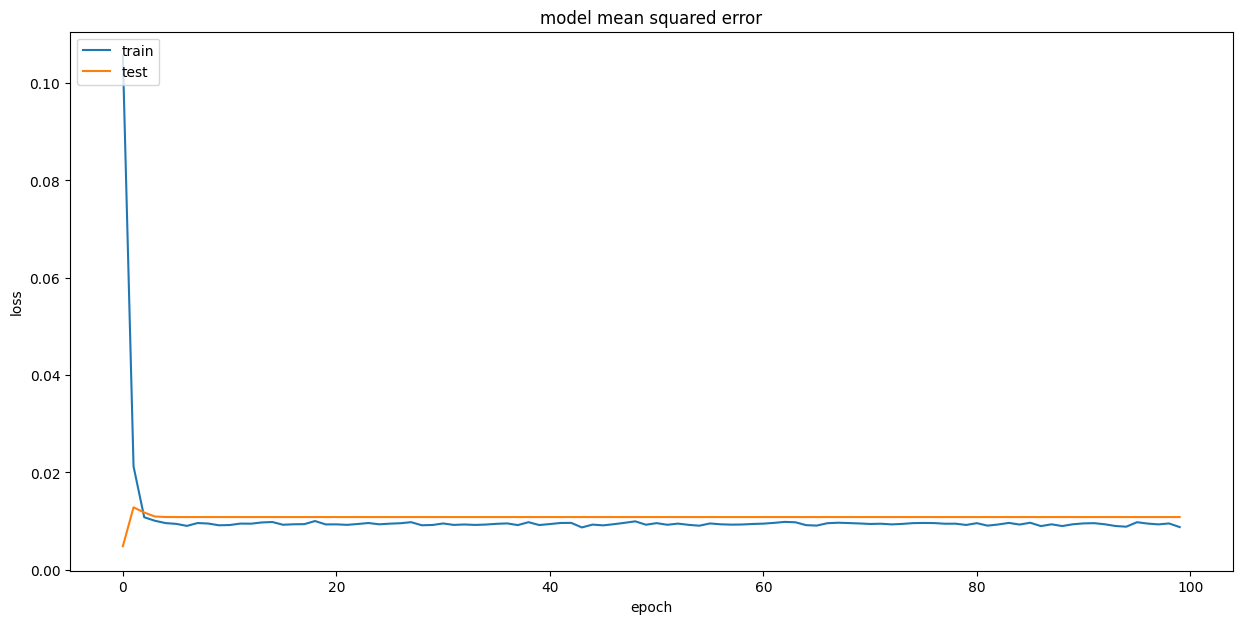

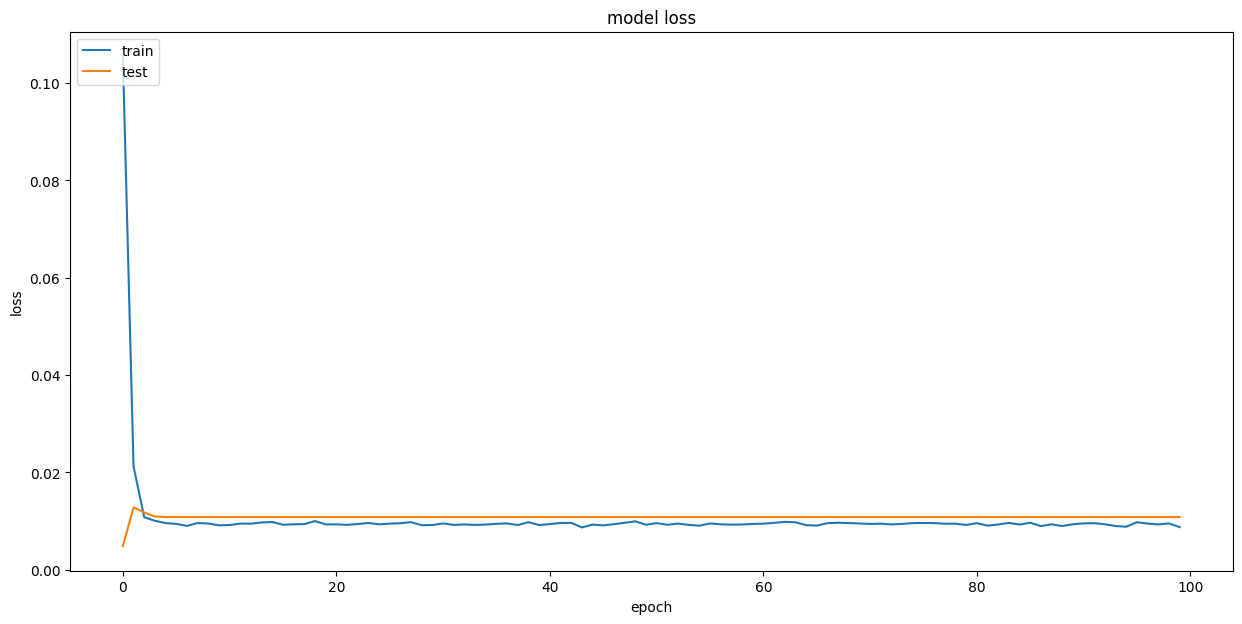

In [218]:
import matplotlib.pyplot as plt
# here comparing the loss with mean squared error
# it call the graph with labels, titlea, lines
plt.plot(history.history['mean_squared_error']) #from fitting 
plt.plot(history.history['val_mean_squared_error'])# val_mean_squared_error is property from callbacks
plt.title('model mean squared error') # setting the title of the graph
plt.ylabel('loss') # label of X axis
plt.xlabel('epoch')# label of y axis
plt.legend(['train', 'test'], loc='upper left') # key of the graph to tell difference between train and test graph
plt.show() # it call the graph with labels, titlea, lines
# summarize history for loss
# plt.plot is used to built the gra
plt.plot(history.history['loss']) # loss is the value of cost function for your traing data
plt.plot(history.history['val_loss'])# val_loss is the value of cost function for your cross-validation data 
plt.title('model loss')#  setting the title of the graph
plt.ylabel('loss') # label of X axis
plt.xlabel('epoch') # label of Y axis
plt.legend(['train', 'test'], loc='upper left')  # key of the graph to tell difference between train and test graph
plt.show() # it call the graph with labels, titles, lines

**Mean squared error vs epoch** : As we see, from the first epooch the value of train reached around 0.025
and for the test it reached further below to 0.008 we is very good as it shows how efficient the model is working.

**loss vs epoch** : As we see, from the first epooch the value of train reached around 0.025
and for the test it reached further below to 0.008 we is very good as it shows how efficient the model is working.

In [219]:
# We required a function that will give loss (mean square error) of train and test value as return 
# Conclusion here is mean square error of test(0.00579) and train(0.00694)
# Inverse transforming the scaled vector earlier and checking for the error visually in the graph.

def model_score(model, X_train, y_train, X_test, y_test):
    # model. evaluate gives us the overall accuracy and loss
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    #here for trainX and trainY we print mean square error and root mean square error
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    # model. evaluate gives us the overall accuracy and loss
    testScore = model.evaluate(X_test, y_test, verbose=0)
    #here for testX and testY we print mean square error and root mean square error
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    # returns the loss of train and test 
    return trainScore[0], testScore[0]

# will return the value of overall mean squared error
model_score(model, trainX, trainY , testX, testY)

Train Score: 0.18892 MSE (0.43 RMSE)
Test Score: 0.37697 MSE (0.61 RMSE)


(0.1889219582080841, 0.3769697844982147)

**Mean Squared Error** - Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better. 

In [220]:
#predicting the value for testX
pred = model.predict(testX)
#converting pred list in 1D array so that it will be efficient in ploting
pred = scaler.inverse_transform(pred)
# prediction here will be the stock market price of further ahead of given company details
pred[:10]
# taking pred from 1 to 10

11/11 [==============================] - 2s 10ms/step


array([[11.300698 ],
       [11.288979 ],
       [11.293496 ],
       [11.298876 ],
       [11.298837 ],
       [11.296113 ],
       [11.2921915],
       [11.284623 ],
       [11.275114 ],
       [11.262782 ]], dtype=float32)

In [221]:
# reshaping testY in single array
testY = testY.reshape(testY.shape[0] , 1)
#converting reshaped list in 1D array so that it will be efficient in ploting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
testY[:10]

array([[34.49    ],
       [35.93    ],
       [36.24    ],
       [36.1     ],
       [35.69    ],
       [35.19    ],
       [34.1     ],
       [32.93    ],
       [31.31    ],
       [31.739998]], dtype=float32)

The space between the predicted (red) and actual (blue) line is self explanatory for the model tuning and performance.

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


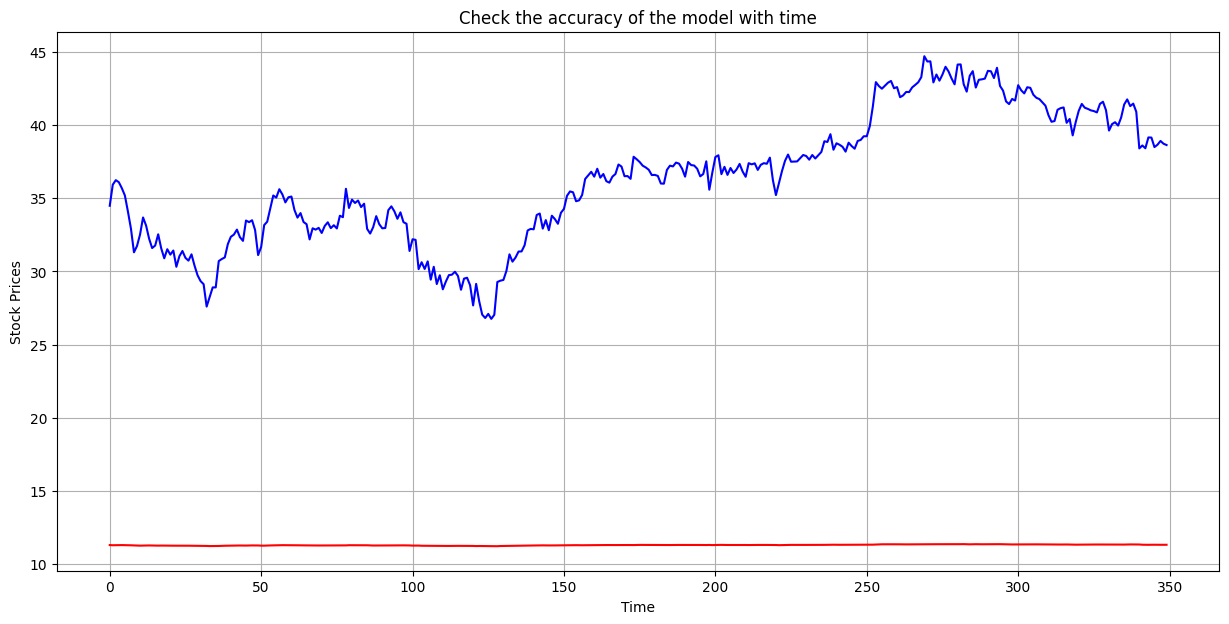

In [222]:
# ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line grap
plt.plot(testY , 'b')
# pred is the red line grap
plt.plot(pred , 'r')
# setting x asix as time
plt.xlabel('Time')
# setting y asux as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

### Conclusion
As the last graph predicts the stock exchange Prices with further ahead Time.The blue(actual) and Red(predicted) are having a minute difference. It's very efficient. The overall error here is calculated with Mean Square Error and it error value is 0.00707 for test data. Since the error is so small .Thus the model is working very properly and is usable.At many place the predicted value and actual value collide in the graph
example price btw 30-35 on time 0-50**